<a href="https://colab.research.google.com/github/Francisakinrinade/Darey.io-Projects/blob/main/Assignment2_Venice_Boat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Define Parameters
batch_size = 32
img_height = 224
img_width = 224
epochs = 6

In [ ]:
# Load and preprocess data
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
num_classes = len(class_names)

print(f"Class names: {class_names}")
print(f"Number of classes: {num_classes}")

Found 5007 files belonging to 2 classes.
Using 4006 files for training.
Found 5007 files belonging to 2 classes.
Using 1001 files for validation.
Class names: ['test', 'train']
Number of classes: 2


In [ ]:
# Build the CNN Model
num_classes = len(train_ds.class_names)
model = Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=[img_height, img_width, 3]),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,511,938 (196.50 MB)

 Trainable params: 51,511,938 (196.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Set dataset path
data_dir = '/content/drive/MyDrive/Dataset3-Boat_dataset/boat_data'

In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Train the Model
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)


Epoch 1/6


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


126/126 ━━━━━━━━━━━━━━━━━━━━ 938s 7s/step - accuracy: 0.8749 - loss: 85.4748 - val_accuracy: 0.9441 - val_loss: 0.2381
Epoch 2/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.9549 - loss: 0.2093 - val_accuracy: 0.9441 - val_loss: 0.2298
Epoch 3/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 163ms/step - accuracy: 0.9560 - loss: 0.1943 - val_accuracy: 0.9441 - val_loss: 0.3398
Epoch 4/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - accuracy: 0.9543 - loss: 0.2087 - val_accuracy: 0.9441 - val_loss: 0.2129
Epoch 5/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.9573 - loss: 0.1773 - val_accuracy: 0.9441 - val_loss: 0.2206
Epoch 6/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 21s 166ms/step - accuracy: 0.9550 - loss: 0.1832 - val_accuracy: 0.9441 - val_loss: 0.2071


In [ ]:
# Using Pretrained Model
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
  base_model,
  layers.AveragePooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'), # Added an intermediate dense layer for better learning
  layers.Dropout(0.25),
  layers.Dense(num_classes, activation='softmax') # Updated to num_classes
])
base_model.trainable = False

model.compile(optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
)

epochs = 6

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs = epochs
)

Epoch 1/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 886s 7s/step - accuracy: 0.9127 - loss: 1.2815 - val_accuracy: 0.9441 - val_loss: 0.1671
Epoch 2/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.9561 - loss: 0.1372 - val_accuracy: 0.9461 - val_loss: 0.1585
Epoch 3/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9596 - loss: 0.1192 - val_accuracy: 0.9491 - val_loss: 0.1698
Epoch 4/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 287s 2s/step - accuracy: 0.9631 - loss: 0.1264 - val_accuracy: 0.9481 - val_loss: 0.1443
Epoch 5/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9692 - loss: 0.0857 - val_accuracy: 0.9441 - val_loss: 0.2089
Epoch 6/6
126/126 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9645 - loss: 0.0968 - val_accuracy: 0.9461 - val_loss: 0.1534


### Confusion Matrix for validation dataset

Generate a confusion matrix to visualize the model's performance on validation dataset.

In [ ]:
# Define image dimensions
img_height = 224
img_width = 224

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, img_height, img_width):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 216ms/step


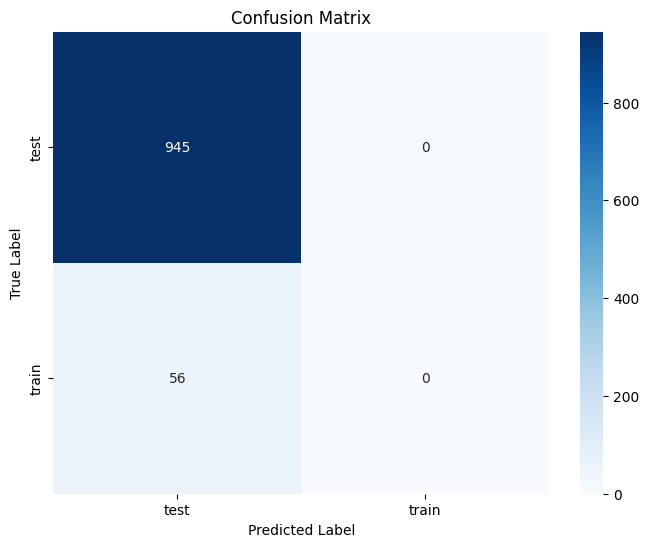

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Obtain the predictions from the model for the val_ds dataset
predictions = model.predict(val_ds)

# Convert the predictions to predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Extract the true class labels from the val_ds dataset
true_classes = []
for images, labels in val_ds:
    true_classes.extend(labels.numpy())

# Get the class names from val_ds
class_labels = val_ds.class_names

# Determine the unique labels present in the true classes
unique_true_classes = np.unique(true_classes)

# Filter class_labels to only include the unique true classes
filtered_class_labels = [class_labels[i] for i in unique_true_classes]

# Compute the confusion matrix using the unique true classes as labels
cm = confusion_matrix(true_classes, predicted_classes, labels=unique_true_classes)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_class_labels, yticklabels=filtered_class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_ds)
print(f"✅ Validation Accuracy: {val_acc:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9373 - loss: 0.1650
✅ Validation Accuracy: 0.95


### Confusion Matrix for test dataset

Let's generate a confusion matrix to visualize the model's performance on each boat type in the test dataset.

150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step


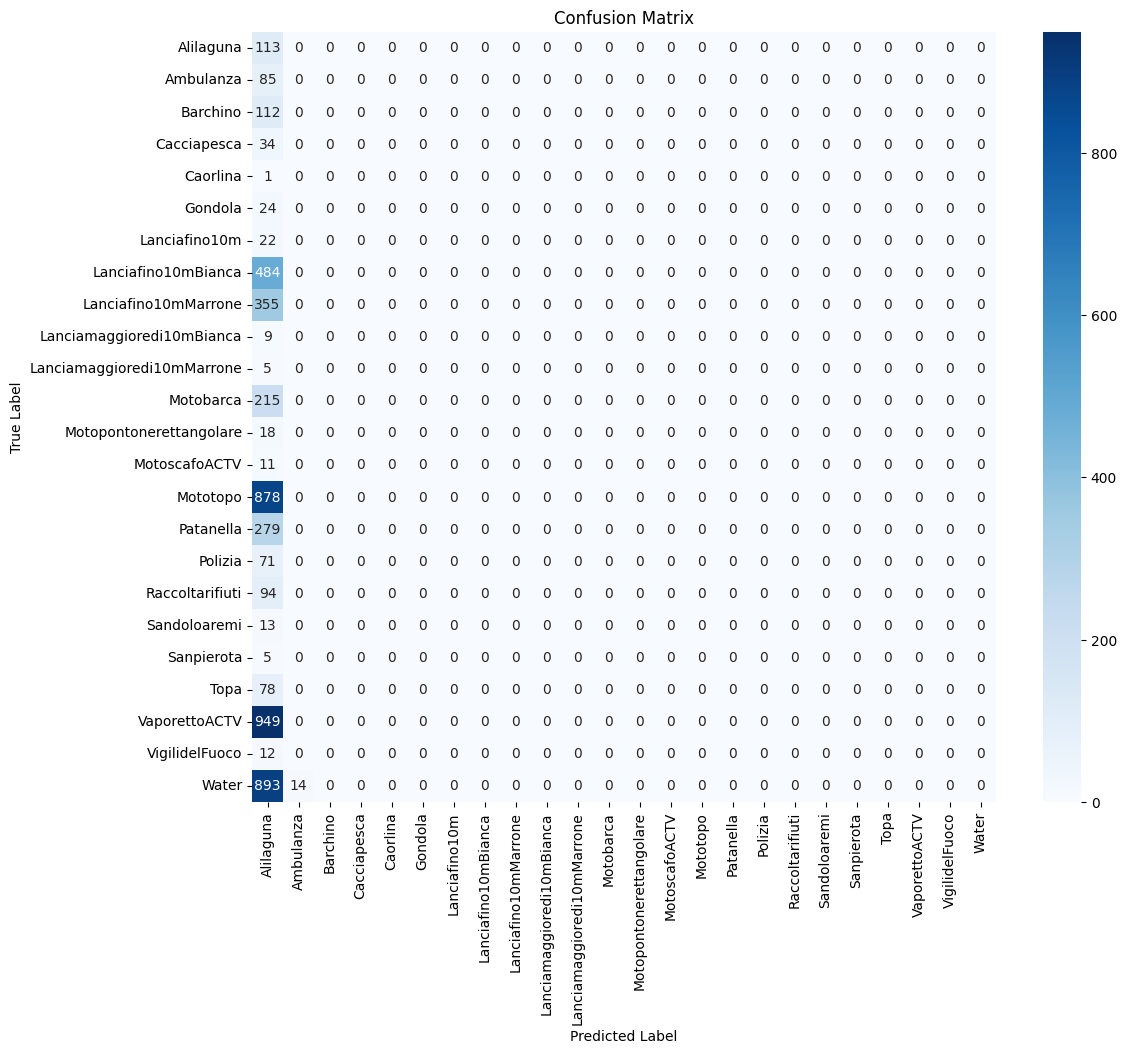

In [ ]:
# Obtain the predictions from the model for the test_ds dataset
predictions = model.predict(test_ds)

# Convert the predictions to predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Extract the true class labels from the test_ds dataset
true_classes = []
for images, labels in test_ds:
    true_classes.extend(labels.numpy())

# Get the class names from test_ds
class_labels = test_ds.class_names

# Determine the unique labels present in the true classes
unique_true_classes = np.unique(true_classes)

# Filter class_labels to only include the unique true classes
filtered_class_labels = [class_labels[i] for i in unique_true_classes]

# Compute the confusion matrix using the unique true classes as labels
cm = confusion_matrix(true_classes, predicted_classes, labels=unique_true_classes)

# Display the confusion matrix using seaborn
plt.figure(figsize=(12, 10)) # Increased figure size for better readability with more classes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_class_labels, yticklabels=filtered_class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Make a Prediction on a New Image

In [ ]:
# Function to preprocess an image and make a prediction
def predict_boat_type(img_path):
    img_array = preprocess_image(img_path, img_height, img_width)
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]
    confidence = np.max(predictions) * 100
    print(f"Predicted class: {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}%")
    return predicted_class_name, confidence

img_path_for_prediction = '/content/drive/MyDrive/Dataset3-Boat_dataset/boat_data/test/Alilaguna/20130304_060950_07485.jpg' # Replace with the path to your new image
predict_boat_type(img_path_for_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: test
Confidence: 93.03%


('test', np.float32(93.02588))

In [ ]:
# Function to preprocess an image and make a prediction
def predict_boat_type(img_path):
    img_array = preprocess_image(img_path, img_height, img_width)
    predictions = model.predict(img_array)

    # Get the probabilities for all classes
    # Assuming the model output is already probabilities due to softmax activation in the last layer
    class_probabilities = predictions[0]

    # Print probabilities for all classes
    print("Class Probabilities:")
    for i, prob in enumerate(class_probabilities):
        print(f"  {class_names[i]}: {prob:.4f}")

    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]
    confidence = np.max(predictions) * 100
    print(f"\nPredicted class: {predicted_class_name}")
    print(f"Confidence: {confidence:.2f}%")

    return predicted_class_name, confidence

# Example usage: Replace with the path to your test image
img_path_for_prediction = '/content/drive/MyDrive/Dataset3-Boat_dataset/boat_data/test/Barchino/20130304_071400_20181.jpg' # Example from Barchino class

print("--- Running prediction ---")
predict_boat_type(img_path_for_prediction)
print("--- Prediction complete ---")

--- Running prediction ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Class Probabilities:
  test: 0.9999
  train: 0.0001

Predicted class: test
Confidence: 99.99%
--- Prediction complete ---
